## Time Series Decompostion

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd 
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


##### check for the missing values in df

In [4]:
s = df.isna().sum()
s[s>1]

Series([], dtype: int64)

In [5]:
df.columns=['Month','Passanger']

In [6]:
df.head()

,Month,Passanger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
### interpolation is used for the replace the missing value
df['Passanger'] = df['Passanger'].interpolate()

#### Convert date into datetime

In [8]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Passanger
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
df.index=df['Month']

In [10]:
df.head()

,Month,Passanger
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [11]:
df = df.drop(columns=['Month'])

In [12]:
df.head()

,Passanger
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Visualize the time series data

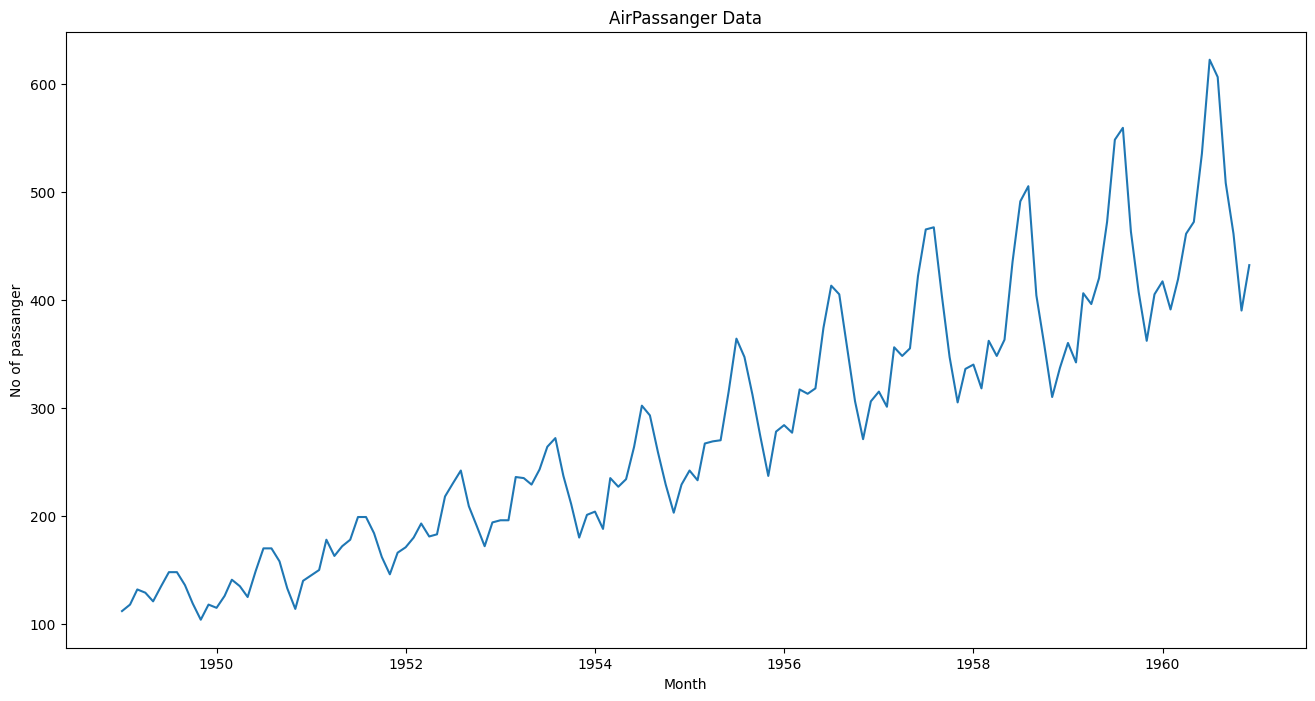

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Passanger'])
plt.xlabel('Month')
plt.ylabel('No of passanger')
plt.title('AirPassanger Data')
plt.show()



#### Perform Time Series Decomposition

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

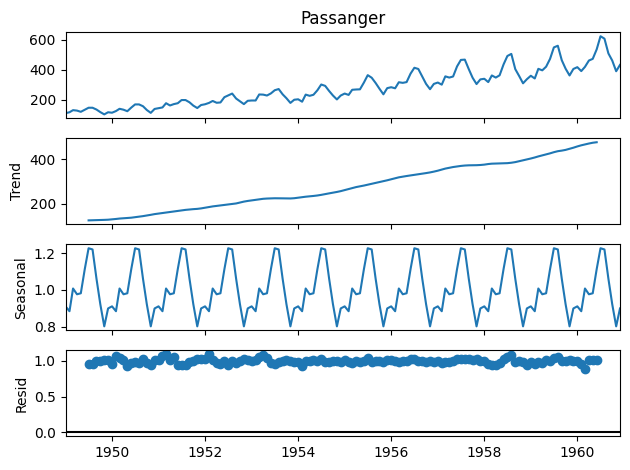

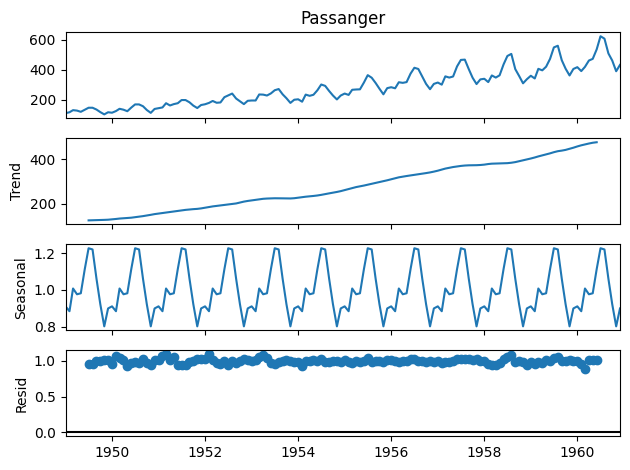

In [45]:
Q = seasonal_decompose(df['Passanger'],model='multiplicative')
Q.plot()

#### Trend graph with observed details

[]

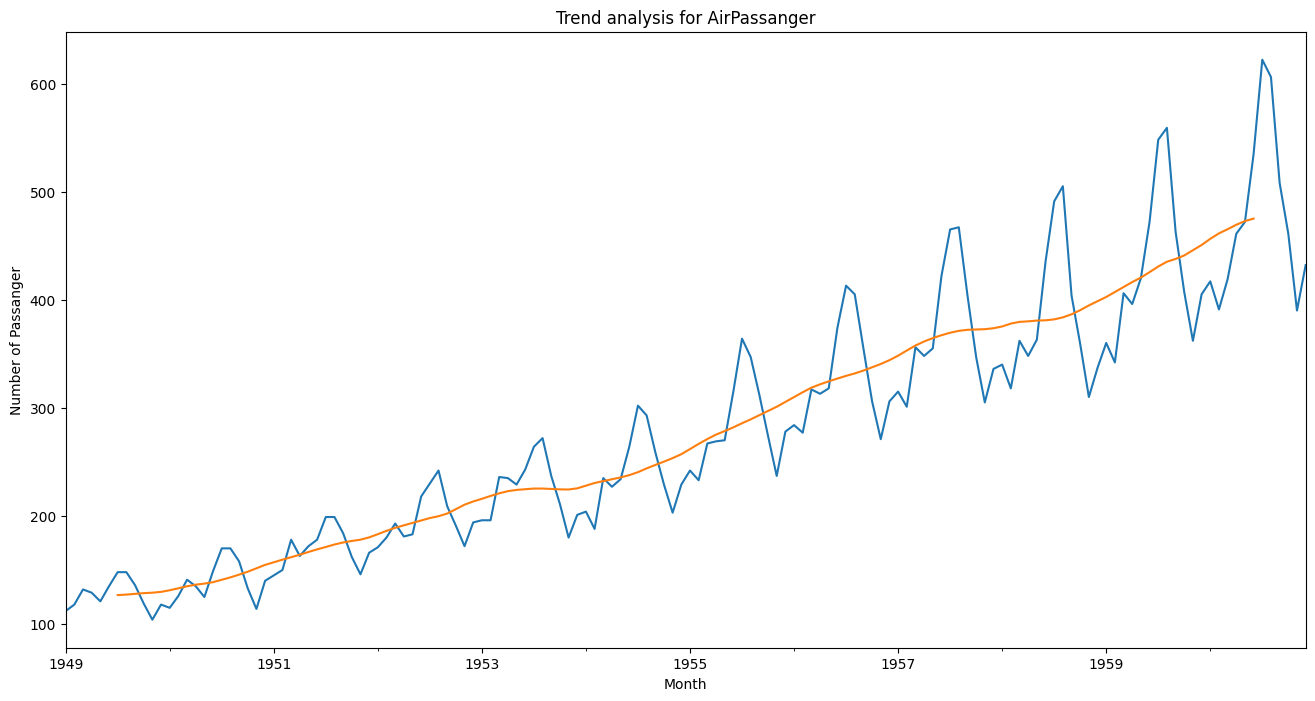

In [16]:
plt.figure(figsize=(16,8))
Q.observed.plot()
Q.trend.plot()
plt.xlabel('Month')
plt.ylabel('Number of Passanger')
plt.title('Trend analysis for AirPassanger')
plt.plot()

[]

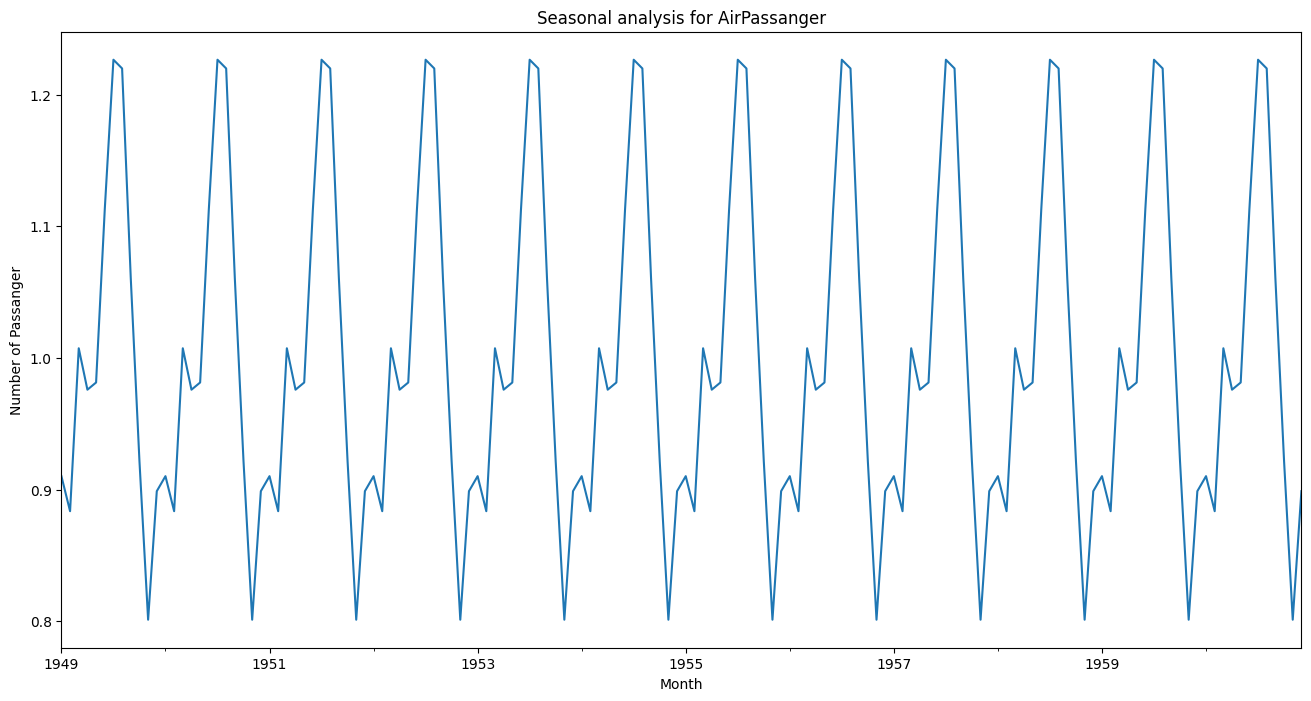

In [17]:
plt.figure(figsize=(16,8))
Q.seasonal.plot()
plt.xlabel('Month')
plt.ylabel('Number of Passanger')
plt.title('Seasonal analysis for AirPassanger')
plt.plot()

##### Residual Plot

[]

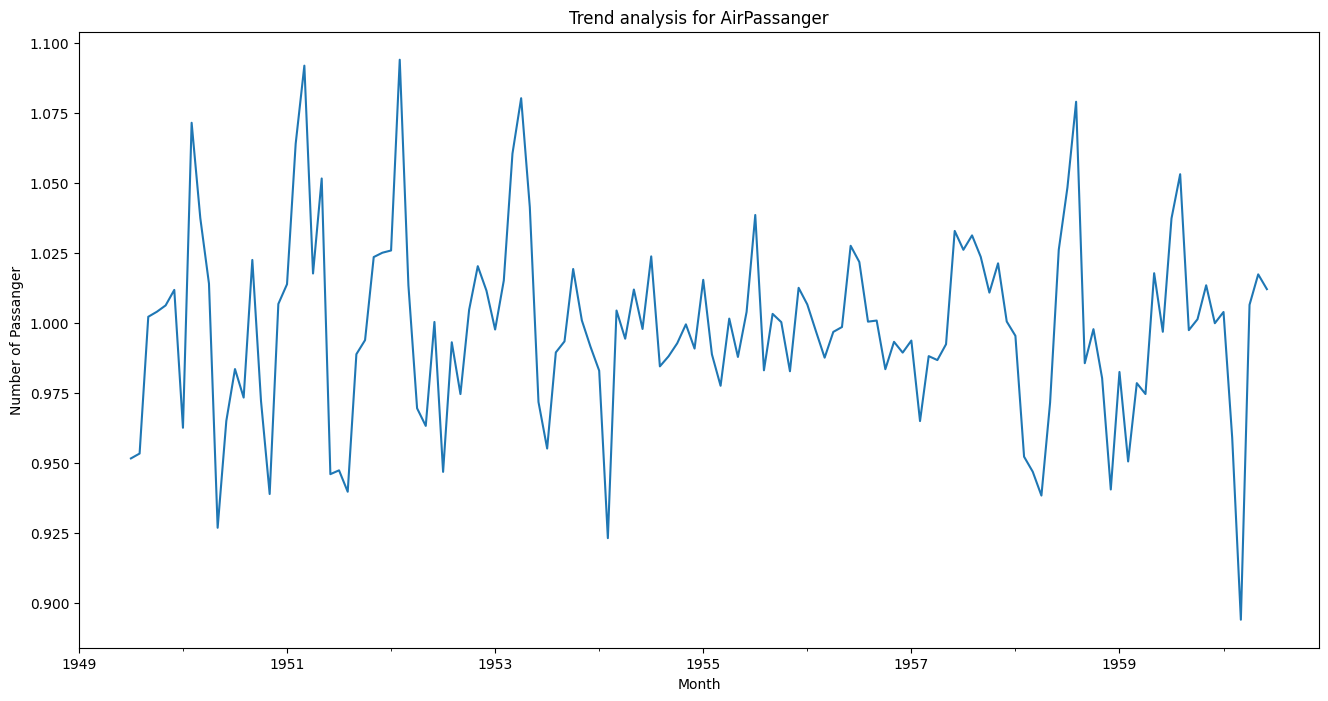

In [18]:
plt.figure(figsize=(16,8))
Q.resid.plot()
plt.xlabel('Month')
plt.ylabel('Number of Passanger')
plt.title('Trend analysis for AirPassanger')
plt.plot()

#### Time series model ARIMA(p,d,q)

### required package is PMDARIMA

In [19]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from pmdarima.arima import auto_arima

In [21]:
model = auto_arima(df['Passanger'],m=12)

In [22]:
model.order

(2, 1, 1)

In [23]:
p = model.order[0]
d = model.order[1]
q = model.order[2]

In [24]:
p

2

In [25]:
d

1

In [26]:
q

1

#### Forcast data for next 3 years

In [27]:
forecast,conf_int = model.predict(n_periods=36,return_conf_int=True) 

In [28]:
forecast

1961-01-01    445.635402
1961-02-01    420.395740
1961-03-01    449.199307
1961-04-01    491.841123
1961-05-01    503.395807
1961-06-01    566.863903
1961-07-01    654.261727
1961-08-01    638.599116
1961-09-01    540.885432
1961-10-01    494.128360
1961-11-01    423.334486
1961-12-01    465.509383
1962-01-01    479.293185
1962-02-01    454.179441
1962-03-01    483.089848
1962-04-01    525.822318
1962-05-01    537.453922
1962-06-01    600.987284
1962-07-01    688.440486
1962-08-01    672.824864
1962-09-01    575.151049
1962-10-01    528.427806
1962-11-01    457.662637
1962-12-01    499.861889
1963-01-01    513.666356
1963-02-01    488.570147
1963-03-01    517.495432
1963-04-01    560.240526
1963-05-01    571.882841
1963-06-01    635.425292
1963-07-01    722.886206
1963-08-01    707.277127
1963-09-01    609.608864
1963-10-01    562.890332
1963-11-01    492.129160
1963-12-01    534.331804
Freq: MS, dtype: float64

In [29]:
forecast = forecast.apply(round)
forecast

1961-01-01    446
1961-02-01    420
1961-03-01    449
1961-04-01    492
1961-05-01    503
1961-06-01    567
1961-07-01    654
1961-08-01    639
1961-09-01    541
1961-10-01    494
1961-11-01    423
1961-12-01    466
1962-01-01    479
1962-02-01    454
1962-03-01    483
1962-04-01    526
1962-05-01    537
1962-06-01    601
1962-07-01    688
1962-08-01    673
1962-09-01    575
1962-10-01    528
1962-11-01    458
1962-12-01    500
1963-01-01    514
1963-02-01    489
1963-03-01    517
1963-04-01    560
1963-05-01    572
1963-06-01    635
1963-07-01    723
1963-08-01    707
1963-09-01    610
1963-10-01    563
1963-11-01    492
1963-12-01    534
Freq: MS, dtype: int64

In [30]:
conf_int

array([[423.34532763, 467.92547559],
       [394.23623036, 446.55525018],
       [419.83281221, 478.56580133],
       [460.37756844, 523.30467773],
       [470.38191927, 536.40969454],
       [532.70090257, 601.02690418],
       [619.22279672, 689.30065679],
       [602.88155687, 674.31667591],
       [504.6329689 , 577.137895  ],
       [457.44762014, 530.80909942],
       [386.3055169 , 460.36345549],
       [428.19297411, 502.82579271],
       [433.49944601, 525.08692426],
       [405.11100127, 503.24788067],
       [431.15790246, 535.02179347],
       [471.84291121, 579.80172525],
       [481.87599554, 593.03184796],
       [544.15902802, 657.81554087],
       [630.61119359, 746.26977859],
       [614.18156658, 731.46816158],
       [515.83474597, 634.46735236],
       [468.54638075, 588.30923168],
       [397.29946163, 518.02581169],
       [439.08204599, 560.64173237],
       [446.32951534, 581.00319736],
       [418.32068077, 558.81961276],
       [444.6267628 , 590.36410084],
 

In [38]:
lower = conf_int[:,0]
lower = pd.Series(lower,index=forecast.index)
lower = lower.apply(round)
lower

1961-01-01    423
1961-02-01    394
1961-03-01    420
1961-04-01    460
1961-05-01    470
1961-06-01    533
1961-07-01    619
1961-08-01    603
1961-09-01    505
1961-10-01    457
1961-11-01    386
1961-12-01    428
1962-01-01    433
1962-02-01    405
1962-03-01    431
1962-04-01    472
1962-05-01    482
1962-06-01    544
1962-07-01    631
1962-08-01    614
1962-09-01    516
1962-10-01    469
1962-11-01    397
1962-12-01    439
1963-01-01    446
1963-02-01    418
1963-03-01    445
1963-04-01    485
1963-05-01    495
1963-06-01    558
1963-07-01    644
1963-08-01    628
1963-09-01    529
1963-10-01    482
1963-11-01    410
1963-12-01    452
Freq: MS, dtype: int64

In [37]:
upper = conf_int[:,1]
upper = pd.Series(upper,index=forecast.index)
upper = upper.apply(round)
upper

1961-01-01    468
1961-02-01    447
1961-03-01    479
1961-04-01    523
1961-05-01    536
1961-06-01    601
1961-07-01    689
1961-08-01    674
1961-09-01    577
1961-10-01    531
1961-11-01    460
1961-12-01    503
1962-01-01    525
1962-02-01    503
1962-03-01    535
1962-04-01    580
1962-05-01    593
1962-06-01    658
1962-07-01    746
1962-08-01    731
1962-09-01    634
1962-10-01    588
1962-11-01    518
1962-12-01    561
1963-01-01    581
1963-02-01    559
1963-03-01    590
1963-04-01    635
1963-05-01    648
1963-06-01    713
1963-07-01    802
1963-08-01    787
1963-09-01    690
1963-10-01    644
1963-11-01    574
1963-12-01    617
Freq: MS, dtype: int64

#### Plotting forecaste sheet

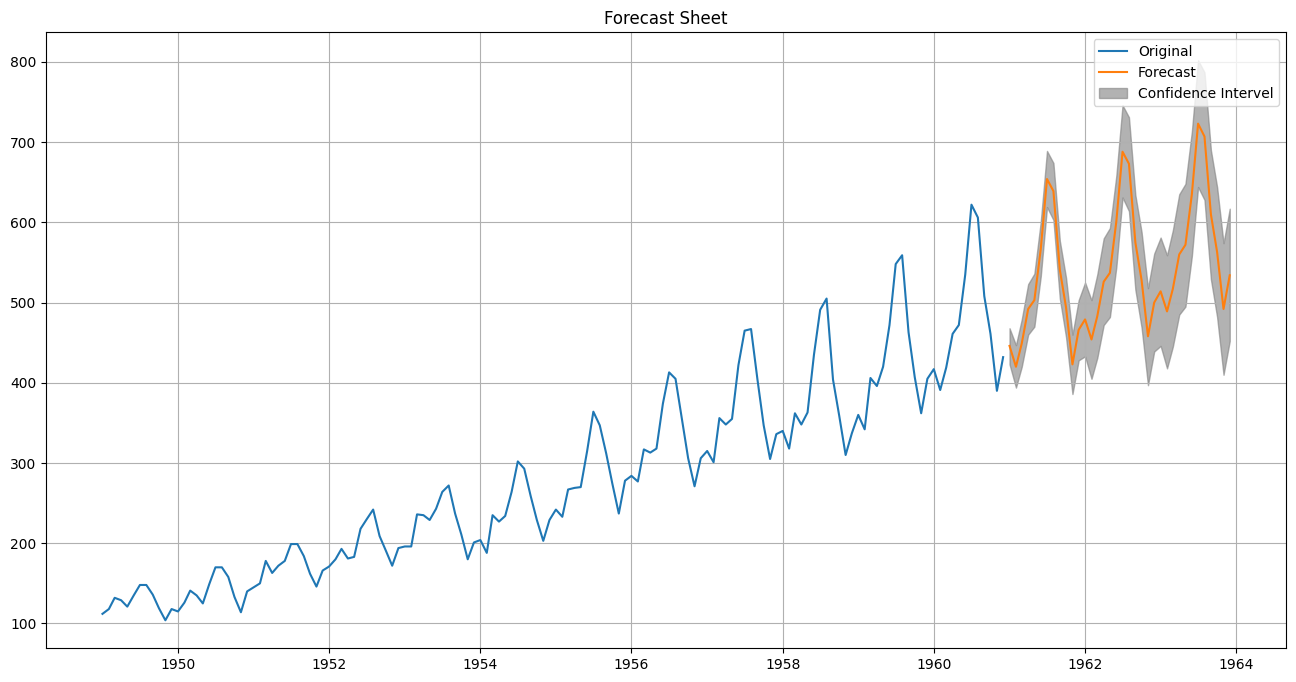

In [43]:
plt.figure(figsize=(16,8))
plt.plot(df['Passanger'],label='Original')
plt.plot(forecast,label='Forecast')
plt.fill_between(forecast.index,lower,upper,color='grey',alpha=0.6,label='Confidence Intervel')
plt.title('Forecast Sheet')
plt.grid()
plt.legend()
plt.show()